$$ \text{IESR, Jinan University} $$
$$ \text{Term 2 --- 2020-21 Academic Year} $$

-  Student Name (in Pinyin): Haoye Liao 

-  Student ID: 2019052811 

-  Date of Submission:  dd/mm/yyyy  


**Note:**

1. Please submit your Python script as a SINGLE Jupyter notebook file (with .ipynb extension) in which ALL outputs generated by your code should be kept. In addition to the script, you need to export your Jupyter notebook file to a pdf file and submit this pdf document. You must also fill up the cover page for the examination and submit its pdf document. In summary, please submit: 
    -	ONE document of your Jupyter notebook script and results (as a pdf)  per student
    -	Cover page for the examination (as a one-page pdf) per student
    -	ONE raw Python script (as an ipynb) per student 
    - Please ensure this is done prior to the deadline. 
2. The full mark of the final project is 100 points.  In your Python script, annotations and comments should be made properly. For each question, 90% points are given on the correctness of answer, 10 points on the clarity of writing and coding, and the efficiency of the code. For each question, 50% of marks will be given for a serious (but failed) attempt. Only one re-submission is allowed before the deadline. 
3. Two datafiles are attached to this group project, namely: **“F4_FinalProj2021_1.csv”**, and **“F4_FinalProj2021_2.csv”**.  For description of the variables, please see the next two tables.

```python
F4_FinalProj2021_1.csv (first dataset)

----------------------------------------------------------------------------------- 
variable name   type    format                variable label
----------------------------------------------------------------------------------- 
id              int     %8.0g                 respondent identifier
educ            byte    %8.0g                 years schooling
regprc          float   %9.0g                 price of regular apples
ecoprc          float   %9.0g                 price of ecolabeled apples
hhsize          byte    %9.0g                 household size
faminc          int     %9.0g                 family income, thousands
age             byte    %9.0g                 in years
reglbs          float   %9.0g                 quantity regular apples, pounds
ecolbs          float   %9.0g                 quantity ecolabeled apples, lbs
----------------------------------------------------------------------------------- 
 
F4_FinalProj2021_2.csv (second dataset)

----------------------------------------------------------------------------------- 
variable name   type    format                variable label
----------------------------------------------------------------------------------- 
deny            byte    %8.0g                 =1 if mortgage is denied.
loanprc         float   %8.0g                 loan repayment to monthly income
black           byte    %8.0g                 =1 if black
----------------------------------------------------------------------------------- 

```
 
 


# Data Management and Description (10%) 

## In Python, please import both datafiles separately as Pandas’ DataFrames. In both sample, some variables in each dataset contain missing values. For each dataset, please write a single line of Python to drop observations which contain missing values in any variable. Please report the number of dropped samples in each dataset. (5%)

**Answer**

In [467]:
import os
os.getcwd() # The 

'/Users/apple/Desktop/python/Final Exam/Template'

In [14]:
import pandas as pd
df1 = pd.read_csv('./F4_FinalProj2021_1.csv',sep=",",header=0)
df2 = pd.read_csv('./F4_FinalProj2021_2.csv',sep=",",header=0)
df1=df1.apply(pd.to_numeric, errors='coerce')
df2=df2.apply(pd.to_numeric, errors='coerce') # Destring process.
df3=df1.dropna()
df4=df2.dropna()
print(df3)
print(df4)
print('The number of dropped samples in 1st dataset is', df1.shape[0]-df3.shape[0])
print('The number of dropped samples in 2nd dataset is', df2.shape[0]-df4.shape[0])

        id  educ  regprc  ecoprc  hhsize  faminc   age    reglbs    ecolbs
0    10002  16.0    1.19    1.19     4.0      45  43.0  2.000000  2.000000
1    10004  16.0    0.59    0.79     1.0      65  37.0  0.000000  2.000000
2    10034  18.0    0.59    0.99     3.0      65  44.0  0.000000  2.666667
3    10035  12.0    0.89    1.09     2.0      55  55.0  3.000000  0.000000
4    10039  15.0    0.89    1.09     1.0      25  22.0  0.000000  3.000000
..     ...   ...     ...     ...     ...     ...   ...       ...       ...
655  13892  14.0    0.59    0.59     5.0      65  76.0  1.333333  1.333333
656  13893  16.0    0.59    0.59     4.0      65  76.0  0.000000  2.000000
657  13908  16.0    0.89    1.09     2.0      75  76.0  1.000000  0.000000
658  13916  12.0    0.59    0.59     1.0      15  76.0  0.000000  2.666667
659  13921  18.0    1.19    1.39     3.0      25  76.0  2.000000  0.000000

[656 rows x 9 columns]
      deny  loanprc  black
0      0.0    0.350    0.0
1      0.0    0.310   

## For the second dataset, please use Python Pandas to produce a summary statistic table of variables loanprc and black by the value of deny. (5%)
**Answer**

In [15]:
print('Summary of loanprc:\n',df2['loanprc'].groupby(df2['deny']).describe(),'\n')
print('Summary of black:\n',df2['black'].groupby(df2['deny']).describe(),'\n')

Summary of loanprc:
        count      mean       std   min   25%   50%   75%   max
deny                                                          
0.0   2093.0  0.322839  0.078953  0.00  0.28  0.33  0.37  1.28
1.0    285.0  0.388771  0.215564  0.04  0.31  0.37  0.42  3.00 

Summary of black:
        count      mean       std  min  25%  50%  75%  max
deny                                                     
0.0   2093.0  0.116101  0.320423  0.0  0.0  0.0  0.0  1.0
1.0    285.0  0.336842  0.473462  0.0  0.0  0.0  1.0  1.0 



# Linear Probability Model (10%)
Using the first dataset, the main purpose of this exercise is to model the individual choice on buying ecolabeled apples instead of regular apples. Please using Python to implement following exercises: 

## In Python, please define a binary variable as $ecobuy = 1$ if $ecolbs > 0$. Then please use a suitable Python module to estimate the linear probability model and carefully interpret the coefficients on the price variables in one to two sentences in your Jupyter notebook script. (5%):
$$ ecobuy=\beta_0+\beta_1 ecoprc+\beta_2 regprc+\beta_3 \ln⁡(faminc)+\beta_4 hhsize+\beta_5 educ+\beta_6 age+u $$

**Answer**

In [16]:
import numpy as np
import statsmodels.api as sm
df3['ecobuy']=np.zeros(df3.shape[0])
df3.loc[df3['ecolbs']>0,'ecobuy']=1
exo=sm.add_constant(np.hstack([np.array(df3['ecoprc']).reshape(656,1),np.array(df3['regprc']).reshape(656,1),np.array(np.log(df3['faminc'])).reshape(656,1),np.array(df3['hhsize']).reshape(656,1),np.array(df3['educ']).reshape(656,1),np.array(df3['age']).reshape(656,1)]))
mod=sm.OLS(df3['ecobuy'], exo)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ecobuy   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     14.10
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           3.97e-15
Time:                        01:10:36   Log-Likelihood:                -415.28
No. Observations:                 656   AIC:                             844.6
Df Residuals:                     649   BIC:                             876.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3598      0.174      2.069      0.0

##  In Python, please find a suitable testing statistic you learned from the undergraduate econometric course to test for heteroscedasticity in the residuals. Re-estimate the model using robust standard errors if you found evidence of heteroscedasticity. (5%)

**Answer**

- I use the Breusch-Pagan test.
- $$\hat u^2=X\delta+\varepsilon$$ where $\hat u^2$ is the residuals drawn from the original regression, $X$ is all explanatory variables. 
- What I need to do is to compute the $F$-statistic: if the $p$-value of the $F$-test is sufficiently small, then reject the null of homoskedasticity.


In [17]:
ecobuy_hat=res.predict()
u_hat_sq=(ecobuy_hat-np.array(df3['ecobuy']))**2
heter=sm.OLS(u_hat_sq, exo)
print(heter.fit().summary())
# From the F-statistic, can infer that there is heteroskedasticity.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     7.122
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           2.30e-07
Time:                        01:10:36   Log-Likelihood:                 255.16
No. Observations:                 656   AIC:                            -496.3
Df Residuals:                     649   BIC:                            -464.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2236      0.063      3.573      0.0

In [18]:
# This is the robust-heteroskedasticity OLS.
print('\n\nAfter Robust-heteroskedasticity adjustment, the estimates are:\n')
print(mod.fit(cov_type='HC1').summary())



After Robust-heteroskedasticity adjustment, the estimates are:

                            OLS Regression Results                            
Dep. Variable:                 ecobuy   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     15.58
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           9.54e-17
Time:                        01:10:36   Log-Likelihood:                -415.28
No. Observations:                 656   AIC:                             844.6
Df Residuals:                     649   BIC:                             876.0
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

# Logit Model and Probit Model (80%)
Using the second dataset, the main purpose of this exercise is to model the racial discrimination in lending markets. In this dataset, each observation is an application for a mortgage loan in Boston, 1994.

Let $deny_i  = 1$ if the loan application was rejected and $deny_i=0$ if it was approved. Many factors can impact whether a loan is rejected; we will only look at a few here. Let loanprc be the amount of the monthly repayment as percentage of monthly income, and $black = 1$ if applicant is black. We might be particularly interested in the impact of race, i.e. the black coefficient. 

## Now consider the probit model. Please use a Python StatsModels to estimate the below probit model. Carefully interpret the estimated coefficient in your Notebook script. (10%)
$$\Pr(deny_i=1)=\Phi(\beta_0+\beta_1 loanprc_i +\beta_2 black_i) $$
$$\Phi(z)=\int_{-\infty}^z \phi(z) $$
$$\phi(z) = \dfrac{1}{\sqrt{2\pi}} e^{-z^2/2} $$

**Answer**

In [19]:
X=sm.add_constant(np.hstack([np.array(df4['loanprc']).reshape(2377,1),np.array(df4['black']).reshape(2377,1)]))
probit_mod = sm.Probit(df4['deny'], X,missing='drop')
probit_res = probit_mod.fit(disp=0)

print(probit_res.summary())


                          Probit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 2377
Model:                         Probit   Df Residuals:                     2374
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                 0.08597
Time:                        01:10:36   Log-Likelihood:                -796.76
converged:                       True   LL-Null:                       -871.70
Covariance Type:            nonrobust   LLR p-value:                 2.845e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2599      0.130    -17.381      0.000      -2.515      -2.005
x1             2.7481      0.360      7.632      0.000       2.042       3.454
x2             0.7071      0.083      8.474      0.0

- Suppose that we have a latent variale $deny^*$ such that $deny^*=\beta_0+\beta_1 loanprc +\beta_2 black+\varepsilon$ and that $deny=1$ if $deny^*>0$
- Holding other factors fixed, when $loanprc$ increases one percentage point, $deny^*$ would increase 0.0275 units.
- Holding other factors fixed, $deny^*$ for black people is 0.7 units higher than people with other races.

## For following tasks, please consider the logit model.  
$$\Pr(deny_i=1)=\Lambda(\beta_0+\beta_1 loanprc_i +\beta_2 black_i) $$ 
$$\Lambda(z) = \dfrac{e^{z}}{ 1- e^{z} } $$


## Please use Python StatsModels to estimate the model. Please report the maximum likelihood estimates of the regression coefficients.  Then please use Python machine learning module (scikit-learn) to find the same maximum likelihood estimates as those obtained from Python StatsModels. (10%)

**Answer**

In [20]:
X=sm.add_constant(np.hstack([np.array(df4['loanprc']).reshape(2377,1),np.array(df4['black']).reshape(2377,1)]))
logit_mod = sm.Logit(df4['deny'], X,missing='drop')
logit_res = logit_mod.fit(disp=0)

print(logit_res.summary())

from sklearn.linear_model import LogisticRegression
X1=np.hstack([np.array(df4['loanprc']).reshape(2377,1),np.array(df4['black']).reshape(2377,1)])
clf = LogisticRegression(fit_intercept=True,C=1e9).fit(X1, df4['deny'])
print('\nestimates from sklearn are that', clf.coef_,'\n')
print('estimate of the intercept from sklearn is that',clf.intercept_)

                           Logit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 2377
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                 0.08763
Time:                        01:10:36   Log-Likelihood:                -795.31
converged:                       True   LL-Null:                       -871.70
Covariance Type:            nonrobust   LLR p-value:                 6.671e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1288      0.269    -15.354      0.000      -4.656      -3.602
x1             5.3857      0.730      7.378      0.000       3.955       6.816
x2             1.2705      0.146      8.689      0.0

## In Python, make the following plots: 
a. Plot the original data of the variables “loanprc” and “deny”.

b. Plot the log-likelihood function of the coefficient on “loanprc” and highlight the maximum likelihood estimate of the coefficient, given other coefficients are fixed at their estimated values. 

c. Plot a curve of the predicted probabilities that each point lies in either of the two categories of variable. 

Please try to present these plots meaningfully (e.g. show them in one or two graphs). You might wish to add other plots into the graph that you feel useful. As a note in your Python Jupyter notebook, please describe what you have learned from the graph. (10%)


**Answer**

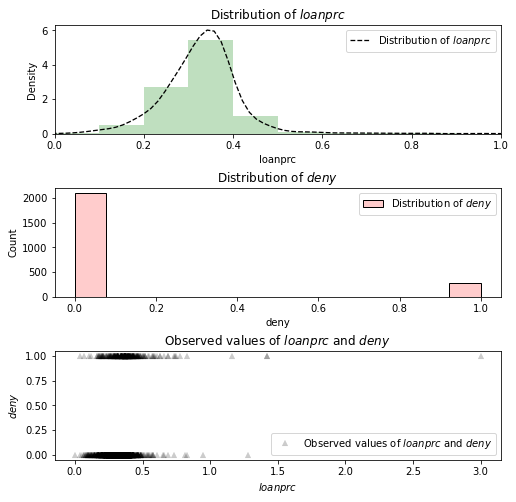

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
plt.subplots_adjust(wspace =0.5, hspace =0.5)
plt.subplot(3,1,1)
plt.xlim(0,1)
sns.distplot(df2['loanprc'],bins=30, 
             hist_kws={'color':'green', "linewidth": 5, "alpha": 0.25},
             kde_kws={"color": "k", "lw": 1.3, "label": r"Distribution of $loanprc$",  'linestyle':'--'})
plt.legend(loc=0)
plt.title(r"Distribution of $loanprc$")
plt.subplot(3,1,2)
sns.histplot(df2['deny'], color='red',alpha=0.2,label=r'Distribution of $deny$')
plt.legend(loc=0)
plt.title(r'Distribution of $deny$')
plt.subplot(3,1,3)
plt.plot(np.array(df4['loanprc']), np.array(df4['deny']), '^k', markeredgewidth=0.1, alpha=0.2,label="Observed values of $loanprc$ and $deny$") 
plt.xlabel('$loanprc$')
plt.ylabel('$deny$') 
plt.legend(loc=0)
plt.title('Observed values of $loanprc$ and $deny$')
plt.show()

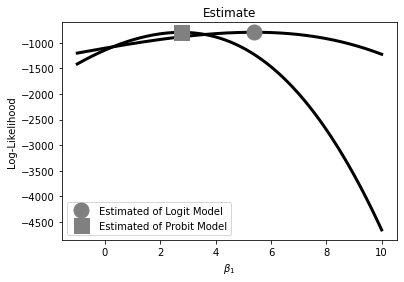

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sns
import scipy as sp
def loglikelihood(parm,x,y,method):
    
    mu_vec=np.array((-np.inf,0,np.inf)) 
    # Since logit and probit are the special cases of ordered logit and probit, I use the similar method by setting the threhold (only zero here) to estimate them.
    
    if method=='logit':
        inner=stat.logistic.cdf(mu_vec[[y.astype('int')+1]]-np.dot(x,parm),0,1)-stat.logistic.cdf(mu_vec[[y.astype('int')]]-np.dot(x,parm),0,1)
    elif method=='probit':
        inner=stat.norm.cdf(mu_vec[[y.astype('int')+1]]-np.dot(x,parm),0,1)-stat.norm.cdf(mu_vec[[y.astype('int')]]-np.dot(x,parm),0,1)
    
    return -np.sum(np.log(inner))

res1=sp.optimize.minimize(loglikelihood,np.array([-4,5,1]),args=(X,np.array(df4['deny']),'logit'))
res2=sp.optimize.minimize(loglikelihood,np.array([-4,5,1]),args=(X,np.array(df4['deny']),'probit'))

beta1=np.linspace(-1,10,1000)
pr1=np.zeros(len(beta1))
pr2=np.zeros(len(beta1))
for i in range(len(beta1)):
    pr1[i]=-1*loglikelihood([res1.x[0],beta1[i],res1.x[2]],X,np.array(df4['deny']),'logit')
for i in range(len(beta1)):
    pr2[i]=-1*loglikelihood([res2.x[0],beta1[i],res2.x[2]],X,np.array(df4['deny']),'probit')
plt.plot(beta1,pr1,'k-',lw=3)
plt.plot(beta1,pr2,'k-',lw=3)
plt.plot(res1.x[1],-1*loglikelihood([res1.x[0],res1.x[1],res1.x[2]],X,np.array(df4['deny']),'logit'),'o', color='gray',ms=15,label='Estimated of Logit Model')
plt.plot(res2.x[1],-1*loglikelihood([res2.x[0],res2.x[1],res2.x[2]],X,np.array(df4['deny']),'probit'),'s', color='gray',ms=15,label='Estimated of Probit Model')
plt.xlabel(r'$\beta_1$')
plt.ylabel('Log-Likelihood')
plt.title('Estimate')
plt.legend(loc=0)
plt.show()

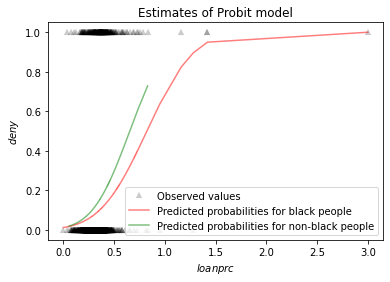

In [23]:
plt.plot(np.array(df4['loanprc']), np.array(df4['deny']), '^k', markeredgewidth=0.1, alpha=0.2, label="Observed values") 

x1=df4['loanprc'][df4['black']==0]
x2=df4['loanprc'][df4['black']==1]
sns.lineplot(x1,stat.norm.cdf(probit_res.params[0]+probit_res.params[1]*x1),color='red' ,alpha=0.5,label="Predicted probabilities for black people") 
sns.lineplot(x2,stat.norm.cdf(probit_res.params[0]+probit_res.params[1]*x2+probit_res.params[2]*x2), color='green',alpha=0.5,label="Predicted probabilities for non-black people") 
plt.xlabel('$loanprc$')
plt.ylabel('$deny$') 
plt.legend(loc=4) 
plt.title('Estimates of Probit model')
plt.show()

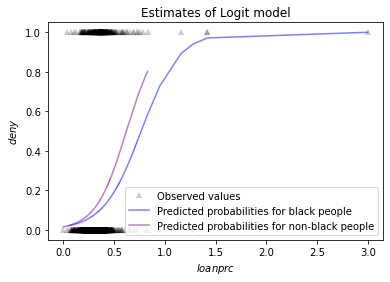

In [24]:
plt.plot(np.array(df4['loanprc']), np.array(df4['deny']), '^k', markeredgewidth=0.1, alpha=0.2, label="Observed values") 

x1=df4['loanprc'][df4['black']==0]
x2=df4['loanprc'][df4['black']==1]
sns.lineplot(x1,stat.logistic.cdf(logit_res.params[0]+logit_res.params[1]*x1),color='blue' ,alpha=0.5,label="Predicted probabilities for black people") 
sns.lineplot(x2,stat.logistic.cdf(logit_res.params[0]+logit_res.params[1]*x2+logit_res.params[2]*x2), color='purple',alpha=0.5,label="Predicted probabilities for non-black people") 
plt.xlabel('$loanprc$')
plt.ylabel('$deny$') 
plt.legend(loc=0) 
plt.title('Estimates of Logit model')
plt.show()

## Please use Python to compute the marginal effect of $loanprc_i$ evaluated at the mean of each of the explanatory variables. Also, use Python to compute the marginal effect of $black_i$ evaluated properly, i.e. comparing $black = 0$ to $black = 1$. (10%)


**Answer**

In [25]:
margeff = probit_res.get_margeff(at="mean",dummy=True)
print(margeff.summary())
margeff1 = logit_res.get_margeff(at="mean",dummy=True)
print(margeff1.summary())

       Probit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5019      0.066      7.581      0.000       0.372       0.632
x2             0.1715      0.025      6.938      0.000       0.123       0.220
        Logit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4969      0.067      7.469      0.000       0.366       0.627
x2             0.1668      0.024      6.834      0.000       0.119       0.215


- In both models, the marginal effect of $loanprc$ is about 0.5, the marginal effect of $black$ is about 0.17.

## (15%) Can you use Symbolic Python module (SymPy) to code the log-likelihood function, and solve the first order condition to obtain the same maximum likelihood estimates? 


**Answer**

In [ ]:
# Probit case.
import numpy as np
import scipy.stats as stats
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import sympy 
from sympy.stats import *
from sympy import summation
y,x1,x2,b0,b1,b2=sympy.symbols('y x_1 x_2 b_0 b_1 b_2')
X = Normal("X", 0, 1)

def phi(x):
    return P(X<x)


ys=np.array(df4['deny'])

x1s=np.array(df4['loanprc'])
x2s=np.array(df4['black'])
pr=[]

for i in range(len(ys)):
    pr.append(sympy.simplify((y*phi(b0+b1*x1+b2*x2)+(1-y)*(1-phi(b0+b1*x1+b2*x2))).subs([(x1,x1s[i]),(x2,x2s[i]),(y,ys[i])])))
L=np.prod(pr) 
logL=sympy.expand_log(sympy.log(sympy.simplify(L)))
d0=sympy.simplify(sympy.diff(logL,b0))
d1=sympy.simplify(sympy.diff(logL,b1))
d2=sympy.simplify(sympy.diff(logL,b2))
beta_hat=nsolve((d0,d1,d2), (b0,b1,b2), (0,0,0),verify=False)
print("Estimate of beta is",beta_hat)

In [ ]:
# Logit case.
import numpy as np
import scipy.stats as stats
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import sympy 
from sympy.stats import *
from sympy import summation
y,x1,x2,b0,b1,b2=sympy.symbols('y x_1 x_2 b_0 b_1 b_2')
X = Logistic("X", 0, 1)

def F(x):
    return P(X<x)


ys=np.array(df4['deny'])

x1s=np.array(df4['loanprc'])
x2s=np.array(df4['black'])
pr=[]

for i in range(len(ys)):
    pr.append(sympy.simplify((y*F(b0+b1*x1+b2*x2)+(1-y)*(1-F(b0+b1*x1+b2*x2))).subs([(x1,x1s[i]),(x2,x2s[i]),(y,ys[i])])))
L=np.prod(pr) 
logL=sympy.expand_log(sympy.log(sympy.simplify(L)))
d0=sympy.simplify(sympy.diff(logL,b0))
d1=sympy.simplify(sympy.diff(logL,b1))
d2=sympy.simplify(sympy.diff(logL,b2))
beta_hat=nsolve((d0,d1,d2), (b0,b1,b2), (0,0,0),verify=False)
print("Estimate of beta is",beta_hat)

- In this problem, I first define all symbols that would be used in the following steps. Then, I construct an empty list $pr$ to store all likelihoods calculated in the $for$-loop. In the $for$-loop, I calculate the each likelihood by the formula: $$y_i \bigg(F(\beta_0+\beta_1 x_{i1}+\beta_2 x_{i2})\bigg)+(1-y_i)\bigg(1-F(\beta_0+\beta_1 x_{i1}+\beta_2 x_{i2})\bigg)$$ for $i=1,...,N$, where $F(·)$ denotes the CDF of Logistic or Normal distribution.
- Then I calculate the product of the list $pr$ and take its Log form denoted as $logL$, which will be $$\sum_{i=1}^{N}\ln \bigg[y_i \bigg(F(\beta_0+\beta_1 x_{i1}+\beta_2 x_{i2})\bigg)+(1-y_i)\bigg(1-F(\beta_0+\beta_1 x_{i1}+\beta_2 x_{i2})\bigg)\bigg]$$
- After that, I have the F.O.C. that $$\frac{\partial logL}{\partial \beta_0}=0, \frac{\partial logL}{\partial \beta_1}=0, \frac{\partial logL}{\partial \beta_2}=0$$ and solve these simultaneous equations by using sympy.nsolve moduel since they are nonlinear and I cannot use sympy.solve moduel.
- Unfortunately, this programe I create is too slow to have any solution. Besides, when I try to use a much smaller sample to do the same process, for some unknown reasons, it will return me an error that the matrix created by my equations is singular and cannot be solved in the nsolve process.

## (25%) Please write a Python class to estimate the logit model and/or probit model. This Python class could:
a. Contain python functions for calculating the log-likelihood function of the logit and probit model. 

b. Employ Python SciPy’s fmin() function to perform a numerical maximum likelihood estimation to find the MLE estimates of $\beta_0,\beta_1$ and $\beta_2$. 

c. Computes the standard errors of MLE of $\beta_0,\beta_1$ and $\beta_2$ by making use of the observed Fisher information matrix (evaluated at the MLE). 

d. Report the estimation results in a formatted table in Python. For example, the table generated by Python should include: MLE point estimates of $\beta$ coefficients, the standard errors, and other relevant statistics such as $z$-test statistics and 95% confidence interval that you might feel useful.   

e. Try to write your own function and program to employ a simulation-based method to estimate the logit and/or probit model. For example, the Bayesian Markov Chain Monte Carlo. Please describe clearly how you estimate the model. 

In the arguments of this Python class, users can specify the data for the outcome variable and the covariates, choose either probit or logit model to estimate, and finally see the estimation results in a formatted table after executing the Python class. Please also try to make your code as efficient as possible. Can your Python class for estimating the logit model run as fast as the logit estimation routine of Python StatsModels?


**Answer**


In [69]:

class logit_probit:
    import scipy as sp
    import pandas as pd
    import numpy as np
    import warnings
    import statsmodels as sm
    warnings.filterwarnings("ignore")
    # By this command, all annoying warning signs would be ignored.
    
    def __init__(self,x,y,distr,Add_intercept):  
        if Add_intercept=='True':
            self.x=sm.add_constant(x)
        elif Add_intercept=='False':
            self.x=x
        # The Matrix of X, one can choose whether to add a constant term.
        self.y=y 
        # Vector of y.
        if distr == 'probit':
            self.distr = sp.stats.norm
        elif distr == 'logit':
            self.distr = sp.stats.logistic # Here, one can choose which model (logit or probit) to use.
        
    def loglikelihood(self,parm):
        mu_vec=np.array((-np.inf,0,np.inf)) 
        # Since logit and probit are the special cases of ordered logit and probit, I use the similar method by setting the threhold (only zero here) to estimate them.
        inner=self.distr.cdf(mu_vec[[self.y.astype('int')+1]]-np.dot(self.x,parm),0,1)-self.distr.cdf(mu_vec[[self.y.astype('int')]]-np.dot(self.x,parm),0,1)
        return -np.sum(np.log(inner))
    
    def params(self):
        def loglikelihood(parm):
            mu_vec=np.array((-np.inf,0,np.inf)) 
            inner=self.distr.cdf(mu_vec[[self.y.astype('int')+1]]-np.dot(self.x,parm),0,1)-self.distr.cdf(mu_vec[[self.y.astype('int')]]-np.dot(self.x,parm),0,1)
            return -np.sum(np.log(inner))
             
        return sp.optimize.fmin_bfgs(loglikelihood,np.array([0,0,0]))
    
    def std(self):
        def loglikelihood(parm):
            mu_vec=np.array((-np.inf,0,np.inf)) 
            inner=self.distr.cdf(mu_vec[[self.y.astype('int')+1]]-np.dot(self.x,parm),0,1)-self.distr.cdf(mu_vec[[self.y.astype('int')]]-np.dot(self.x,parm),0,1)
            return -np.sum(np.log(inner))
        self.res=sp.optimize.minimize(loglikelihood,np.array([0,0,0]), method='bfgs')
        # Since I need to use the Hessian matrix to get the information matrix, I switch to the scipy.minimize moduel, which can easily get it.
        self.std=np.sqrt(np.diagonal(self.res.hess_inv))
        
        return np.sqrt(np.diagonal(self.res.hess_inv))
    
    def summary(self):
        def loglikelihood(parm):
            mu_vec=np.array((-np.inf,0,np.inf)) 
            inner=self.distr.cdf(mu_vec[[self.y.astype('int')+1]]-np.dot(self.x,parm),0,1)-self.distr.cdf(mu_vec[[self.y.astype('int')]]-np.dot(self.x,parm),0,1)
            return -np.sum(np.log(inner))
        self.res=sp.optimize.minimize(loglikelihood,np.array([0,0,0]), method='bfgs')
        self.std=np.sqrt(np.diagonal(self.res.hess_inv))
        self.z=self.res.x/self.std # Calculate the Z-value.
        self.ci_up=1.96*self.std+self.res.x # Upper bound of the 95% CI.
        self.ci_low=-1.96*self.std+self.res.x # Lower bound of the 95% CI.
        self.data = {'coef.':self.res.x,'std.errors':self.std,'z-value':self.z,'[0.025':self.ci_low,'0.975]':self.ci_up} 
        row=['_cons']
        for i in range(self.x.shape[1]-1):
            row.append('x'+str(i+1))
        # By this for loop, the row indices will be x1,x2,...,xN, where N is the number of explanatory variables.
        return pd.DataFrame(self.data, index=row) 
    
    def bootstrap(self,niter, method):
        
        def logl(parm,x,y): # Here, I rewrite the log-likelihood function by adding x & y as the parameters in this function because in the below part I need to use this function in bootstrap estimation
            mu_vec=np.array((-np.inf,0,np.inf)) 
            inner=self.distr.cdf(mu_vec[[y.astype('int')+1]]-np.dot(x,parm),0,1)-self.distr.cdf(mu_vec[[y.astype('int')]]-np.dot(x,parm),0,1)
            return -np.sum(np.log(inner))
            
        def estimate(x,y):
            return sp.optimize.minimize(logl,np.array([0,0,0]),args=(x,y),method='bfgs')
        
        self.Bsample_x=np.zeros(self.x.shape)
        self.Bsample_y=np.zeros(self.y.shape)
        
        self.beta_B=np.zeros([niter,self.x.shape[1]])
       
        
        for k in range(niter): # 'niter' is the number of iterations.

            for i in range(len(self.y)):
                j=np.random.uniform(0,len(self.y),1).astype('int') # Transform it into integer is because j is the index.
                self.Bsample_x[i,:]=self.x[j,:]
                self.Bsample_y[i]=self.y[j]
            # By this for-loop, bootstrap samples are constructed.

            self.beta_B[k,:]=estimate(x=self.Bsample_x, y=self.Bsample_y).x 
            # Then, I estimate beta by different bootstrap samples for 'niter' times and store these estimates in a matrix.
        
            
        self.Res = self.beta_B.mean(axis=0) 
        # Get the results of estimation by taking the sample average columns by columns in the bootstrap beta matrix.
        self.std = self.beta_B.std(axis=0)
        # Also can calculate the bootstrap standard errors.
        
        # (1) I construst the 95% CI by normal approximation method.
        self.res=estimate(x=self.x, y=self.y).x # Estimates by using the original dataset.
        self.z_B=self.Res/self.std
        self.ci_B_up=1.96*self.std+self.res # Upper bound of the 95% CI.
        self.ci_B_low=-1.96*self.std+self.res # Lower bound of the 95% CI.
        
        # (2) I calculate the 95% CI of bootstrap by simply taking the 2.5% and 97.5% percentiles.
        obs = np.array([niter*0.025],dtype='i')
        self.ci_B_up1=np.zeros(self.x.shape[1])
        self.ci_B_low1=np.zeros(self.x.shape[1])
        for i in range(self.x.shape[1]):
    
            self.ci_B_up1[i]=np.percentile(self.beta_B[:,i], 97.5)
                              
            self.ci_B_low1[i]=np.percentile(self.beta_B[:,i], 2.5)
        
        # Then, I use the 'if' to choose which method to use.
        
        row=['_cons']
        for i in range(self.x.shape[1]-1):
            row.append('x'+str(i+1))
        # By this for loop, the row indices will be x1,x2,...,xN, where N is the number of explanatory variables.
    
        if method == 'percentile':
            self.data_B = {'coef.':self.Res,'std.errors':self.std,'[0.025':self.ci_B_low1,'0.975]':self.ci_B_up1} 
            return pd.DataFrame(self.data_B, index=row)
        elif method == 'normal':
            self.data_B = {'coef.':self.Res,'std.errors':self.std,'z-value':self.z_B,'[0.025':self.ci_B_low,'0.975]':self.ci_B_up} 
            return pd.DataFrame(self.data_B, index=row)
    

In [57]:
betaset=[]
for i in range(0,2):
    betaset.append('x'+str(i))
betaset 

['x0', 'x1']

A brief explanation of the Bootstrap sampling in above class:
- In Bootstrap sampling, let $\hat \beta$ denote the estimated value calculated with the original dataset, $\bar \beta$ denote the Bootstrap-estimated value. Let $\hat \beta_i$ be the value of the statistic from the $i$-th bootstrap sample. 
- Then, $$\hat{se}=\bigg(\frac{1}{B-1} \sum_{i=1}^{B}(\hat \beta_i-\bar \beta)^2\bigg)^{1/2}$$
- where, $$\bar \beta=\frac{1}{B}\sum_{i=1}^{B}\hat \beta_i$$
- The normal-approximation method yields the 95\% confidence intervals $$\bigg[\hat \beta-z_{0.025}\hat{se},\hat \beta+z_{0.025}\hat{se}\bigg]$$ where $z_{0.025}(1.96)$ is the 2.5\% quantile of the standard normal distribution.
- The percentile method yields the confidence intervals $$\bigg[\hat \beta_{0.975}^{*},\hat \beta_{0.025}^{*}\bigg]$$ where $\hat \beta_{p}^{*}$ is the $p$-th quantile of the bootstrap distribution.

In [64]:
import time 
start1=time.time()
x=np.hstack([np.array(df4['loanprc']).reshape(2377,1),np.array(df4['black']).reshape(2377,1)])
res=logit_probit(x=x,y=np.array(df4['deny']),distr='logit',Add_intercept='True')
print(res.summary())
end1=time.time()
time1=end1-start1
print('Time used in my Python Class is',time1,'seconds\n')
start2=time.time()
X=sm.add_constant(np.hstack([np.array(df4['loanprc']).reshape(2377,1),np.array(df4['black']).reshape(2377,1)]))
logit_mod = sm.Logit(df4['deny'], X,missing='drop')
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())
end2=time.time()
time2=end2-start2
print('Time used in statsmodel is',time2,'seconds')

print('\nThus, My Python Class is as fast as the statsmodel when doing logit estimation for this particular case.')

          coef.  std.errors    z-value    [0.025    0.975]
_cons -4.128822    0.277054 -14.902616 -4.671847 -3.585797
x1     5.385683    0.726206   7.416195  3.962320  6.809046
x2     1.270481    0.141938   8.950966  0.992283  1.548680
Time used in my Python Class is 0.060030221939086914 seconds

                           Logit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 2377
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                 0.08763
Time:                        01:36:37   Log-Likelihood:                -795.31
converged:                       True   LL-Null:                       -871.70
Covariance Type:            nonrobust   LLR p-value:                 6.671e-34
                 coef    std err          z      P>|z|      [0.025    

In [70]:
# I do the bootstrap simulation using my Python Class.
x=np.hstack([np.array(df4['loanprc']).reshape(2377,1),np.array(df4['black']).reshape(2377,1)])
res=logit_probit(x=x,y=np.array(df4['deny']),distr='logit',Add_intercept='True')
res.bootstrap(10, method='normal')

,coef.,std.errors,z-value,[0.025,0.975]
_cons,-4.155218,0.347233,-11.966657,-4.809399,-3.448246
x1,5.448097,0.907035,6.006493,3.607895,7.163471
x2,1.315578,0.086061,15.286646,1.101803,1.439160


In [71]:
res.bootstrap(10, method='percentile')

,coef.,std.errors,[0.025,0.975]
_cons,-4.129047,0.179681,-4.382526,-3.865004
x1,5.421372,0.382371,5.041279,6.190671
x2,1.283669,0.177249,1.007721,1.543719
